# Clean & Analyze Social Media

## Introduction

Social media has become a ubiquitous part of modern life, with platforms such as Instagram, Twitter, and Facebook serving as essential communication channels. Social media data sets are vast and complex, making analysis a challenging task for businesses and researchers alike. In this project, we explore a simulated social media, for example Tweets, data set to understand trends in likes across different categories.

## Prerequisites

To follow along with this project, you should have a basic understanding of Python programming and data analysis concepts. In addition, you may want to use the following packages in your Python environment:

- pandas
- Matplotlib
- ...

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Scope

The objective of this project is to analyze tweets (or other social media data) and gain insights into user engagement. We will explore the data set using visualization techniques to understand the distribution of likes across different categories. Finally, we will analyze the data to draw conclusions about the most popular categories and the overall engagement on the platform.

## Step 1: Importing Required Libraries

As the name suggests, the first step is to import all the necessary libraries that will be used in the project. In this case, we need pandas, numpy, matplotlib, seaborn, and random libraries.

Pandas is a library used for data manipulation and analysis. Numpy is a library used for numerical computations. Matplotlib is a library used for data visualization. Seaborn is a library used for statistical data visualization. Random is a library used to generate random numbers.

In [1]:
# your code here
import unidecode

# Standard operational package imports.
import pandas as pd
import numpy as np

# Visualization package imports.
import matplotlib
import seaborn as sns

# Others
import calendar as cal
import re
import random

# Important imports for preprocessing, modeling, and evaluation.
from statsmodels.stats.outliers_influence \
    import variance_inflation_factor as smvif
import statsmodels.formula.api as smfapi
import statsmodels.api as smapi
import statsmodels.tools.tools as smtools
import statsmodels.stats.multicomp as smmulti
import sklearn.model_selection as sklmodslct
import sklearn.linear_model as skllinmod
import sklearn.metrics as sklmtrcs

In [2]:
# importing all my important data analysis functions
import data_analysis_functions

## Generating Random Data

We are meant to generate Random Data for each field of data including categories such as "Fashion", "Fitness", "Music" "Culture", "Politics", "Family" and "Health" (which are ofcourse discrete variables)

Continuous varibles must be data such as "No. Likes", "No. Retweets" and "No. Views"

Datetime Variables such as "Date Tweeted" # we will look at bulk data in one year, since it is one company



In [3]:
# generating random dates in the year 2024
# intitialise dataframe
data_twitter = pd.DataFrame()
intended_sample_size = 650

# initialising random dates
start_date = pd.to_datetime('2024-01-01')
end_date = pd.to_datetime('2024-12-31')
days_in_year = (end_date-start_date).days # this correspnds to number of total tweets
data_twitter['Date'] = start_date + pd.to_timedelta\
    (np.random.randint(days_in_year,size=intended_sample_size), unit='d')
data_analysis_functions.df_head(data_twitter,10)

        Date
0 2024-07-28
1 2024-06-30
2 2024-09-02
3 2024-02-05
4 2024-10-26
5 2024-10-26
6 2024-06-28
7 2024-04-01
8 2024-06-30
9 2024-09-19


In [4]:
# categories
categories = ["Fashion", "Fitness", "Music", "Culture",\
              "Politics", "Family", "Health"]
data_twitter['Category'] = [random.choice(categories) for _ in range(intended_sample_size)]
data_analysis_functions.df_head(data_twitter,10)

        Date  Category
0 2024-07-28    Health
1 2024-06-30   Fitness
2 2024-09-02   Fashion
3 2024-02-05    Health
4 2024-10-26  Politics
5 2024-10-26     Music
6 2024-06-28     Music
7 2024-04-01   Fitness
8 2024-06-30   Fashion
9 2024-09-19   Fashion


In [5]:
# categories
realistic_likes_threshold = 2500
num_likes = np.random.randint(realistic_likes_threshold,size=intended_sample_size)
data_twitter['Num_of_Likes'] = [random.choice(num_likes) for _ in range(intended_sample_size)]
data_analysis_functions.df_head(data_twitter,10)

        Date  Category  Num_of_Likes
0 2024-07-28    Health            84
1 2024-06-30   Fitness           994
2 2024-09-02   Fashion           325
3 2024-02-05    Health          1446
4 2024-10-26  Politics           497
5 2024-10-26     Music          2199
6 2024-06-28     Music           799
7 2024-04-01   Fitness           506
8 2024-06-30   Fashion          1686
9 2024-09-19   Fashion          1210


In [6]:
# descriptive stats about our df
# print data types
data_analysis_functions.df_info_dtypes(data_twitter)
# descriptive summary
print(data_twitter.describe())
# counts of each category element
category_counts = data_analysis_functions.df_groupby_mask_operate(data_twitter,\
    'Category', 'Category', 0, '0', 'count')
print(category_counts)
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          650 non-null    datetime64[ns]
 1   Category      650 non-null    object        
 2   Num_of_Likes  650 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 15.4+ KB
None
                                Date  Num_of_Likes
count                            650    650.000000
mean   2024-07-05 02:12:55.384615424   1284.281538
min              2024-01-01 00:00:00      0.000000
25%              2024-04-03 00:00:00    618.750000
50%              2024-07-07 12:00:00   1341.500000
75%              2024-10-07 00:00:00   1934.750000
max              2024-12-30 00:00:00   2495.000000
std                              NaN    755.921103
         Category
            count
Category         
Culture        92
Family        101
Fashion       102
Fitn

In [7]:
# removing all possible null data
data_twitter = data_twitter.dropna(axis=0).reset_index(drop=True)

# convert dataframe date fields to datetime (already done)
data_analysis_functions.df_datetime_converter(data_twitter)
data_analysis_functions.df_head(data_twitter,10)

        Date  Category  Num_of_Likes
0 2024-07-28    Health            84
1 2024-06-30   Fitness           994
2 2024-09-02   Fashion           325
3 2024-02-05    Health          1446
4 2024-10-26  Politics           497
5 2024-10-26     Music          2199
6 2024-06-28     Music           799
7 2024-04-01   Fitness           506
8 2024-06-30   Fashion          1686
9 2024-09-19   Fashion          1210


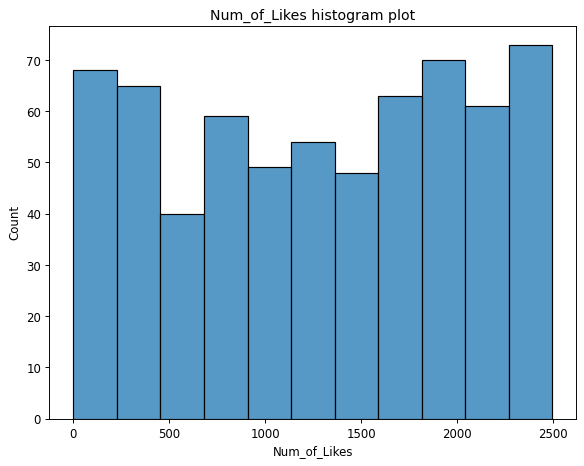

In [8]:
# plot histogram of likes
data_analysis_functions.df_histplotter(data_twitter, "Num_of_Likes",2)

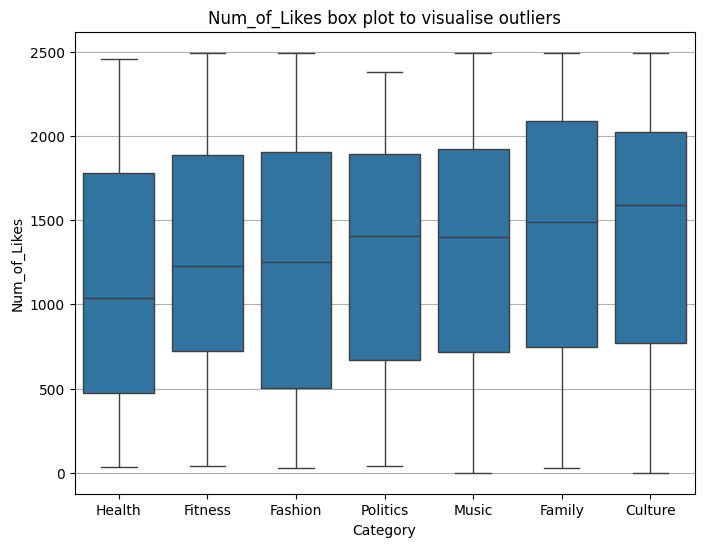

In [9]:
# boxplot of category
data_analysis_functions.df_boxplotter(data_twitter, "Category", "Num_of_Likes",2)

In [10]:
# mean likes 
mean_likes = np.round(data_twitter['Num_of_Likes'].agg(['mean']).values[0],2)
print("There are an average of {} Likes per tweet".format(mean_likes))

There are an average of 1284.28 Likes per tweet


In [11]:
# mean likes grouped by category
mean_likes_grouped = data_analysis_functions.df_groupby_mask_operate(data_twitter,\
                        'Category', 'Num_of_Likes', 0, '0', 'mean')
print(mean_likes_grouped)

         Num_of_Likes
                 mean
Category             
Culture   1372.097826
Family    1406.702970
Fashion   1242.676471
Fitness   1244.950000
Health    1141.031250
Music     1305.976471
Politics  1272.095745


## Early Inferences

We can see how there is no real shape to the distribution of Likes amongst categories, with most categories scoring a mean of 1100 likes. The box plot also shows the quartiles and outliers, which seem to be all similar amongst all likes categories.

We used here NumPy and random seeding and sampling, thus all the data in each category is independent of each 


## Advanced Hypothesis Testing using Regression Analysis

We can see perform a one-way ANOVA test on the Num_of_Likes using the Categories as a Categorical predictor. We do this by 


In [12]:
# one way Linear Regression Analysis
data_analysis_functions.lr_ols_model(data_twitter, col_response="Num_of_Likes",\
                col_cont_predictors=[], col_cat_predictors=["Category"])

running simple linear regression model...
regressed variable: Num_of_Likes
continuous predictors: []
categorical predictors: []


{'Summary': <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:           Num_of_Likes   R-squared:                       0.012
 Model:                            OLS   Adj. R-squared:                  0.003
 Method:                 Least Squares   F-statistic:                     1.330
 Date:                Mon, 17 Mar 2025   Prob (F-statistic):              0.241
 Time:                        22:43:23   Log-Likelihood:                -5226.0
 No. Observations:                 650   AIC:                         1.047e+04
 Df Residuals:                     643   BIC:                         1.050e+04
 Df Model:                           6                                         
 Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------

## Final Inferences

1) R-squared = 0.012, an R-squared this low essentially tells us the variance in Likes has nothing to do with Category of the tweets (0.012 is 1.2% of the variance in Likes is explained by the variance of Categories)

2) P-values, on the Health category with a P-value = 3.6%, has stastistically significant effect on the number of tweets. We can confidently Infer that all other categories have no statistically significant impact on the Num_of_Likes per Tweets

We can see here that the Category of a tweet is likely to have next to no effect on the Number of Likes a tweet gets.


## Functions I've Written for Data Analysis

Please check the data_analysis_functions for some bespoke data analysis functions that made this analysis 10 times easier.

ALL THE FUNCTIONS I WROTE MYSELF.
